In [1]:
# Import Libraries
import numpy as np # maths
import matplotlib.pyplot as plt # nice plots
from mpl_toolkits.mplot3d import Axes3D #  for 3d  graphs

In [2]:
# Generate randon input data to train on - to check the methodology 
observations = 1000 # can try with many more
# two variable linear model
# using np.random.unifrom(low,high,size) method
xs = np.random.uniform(-10,10,size= (observations,1))
zs = np.random.uniform(-10,10,size= (observations,1))

In [3]:
# stack the two vectors together and make a matrix using stack method
inputs = np.column_stack((xs,zs))
print(inputs.shape)
# Supervised learning two important parameters are 
# Inputs and targets apart from weights, biases and outputs

(1000, 2)


In [4]:
# Create the targets we will aim at 
# targets =  f(x,z) = 2*x - 3*z + 5 + noise
# noise is take make the randomizatio of the data

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


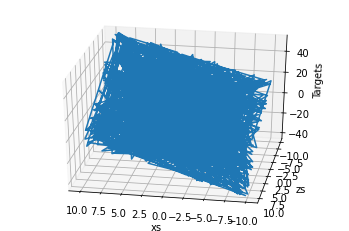

In [5]:
# Plot the 3d way now
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

In [20]:
# Now that we have the targets and input x and z values 
# we need the initial Wegiths and biases so that we can run the algo for objective function

# Initialize weights and biases to start the regression with
 
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

# Need to also set a initial learning rate n 
learning_rate = 0.02
print (weights)
print (biases)

[[ 0.00836015]
 [-0.09517509]]
[-0.02073718]


In [15]:
# Step to Train the model
# A bit complex here, as the delta functions are used directly 

# Loop for the L2-norm loss function 
# Algo is 
    # calculae outputs
    # compare outputs to targets through the loss
    # Print the loss
    # Adjust weights and biases

for i in range (100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs  - targets 
    #difference bewteen outputs and targets
    loss = np.sum(deltas ** 2) /2 / observations 
    # this makes loss value free of no. of observations getting rid of it is good
    # when we change the obseravtions we would see loss relatively free of it
    print(loss)
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.38547081546769485
0.37651415228891666
0.3679118805354117
0.35964997787768105
0.3517149768126419
0.3440939427106166
0.3367744527309459
0.3297445755718528
0.3229928520215515
0.31650827627889716
0.31028027801312885
0.30429870513346113
0.2985538072404363
0.29303621973206245
0.2877369485388315
0.28264735546272834
0.2777591440963417
0.2730643462991154
0.2685553092086972
0.26422468276621597
0.26006540773515213
0.2560707041942675
0.2522340604858385
0.24854922260118054
0.24501018398615917
0.2416111757500678
0.238346657261917
0.23521130711880223
0.23220001447162875
0.22930787069405614
0.22653016138107915
0.22386235866420526
0.2213001138306981
0.21883925023485937
0.21647575648979295
0.2142057799285504
0.2120256203240046
0.20993172385720937
0.20792067732441633
0.20598920257330378
0.20413415115934944
0.20235249921363754
0.20064134251373067
0.1989978917495773
0.19741946797673177
0.19590349824948095
0.19444751142675432
0.1930491341439857
0.19170608694435384
0.19041618056310336
0.18917731235888313
0

In [22]:
# Print weights and baises we got
print(weights,biases)

[[ 0.00836015]
 [-0.09517509]] [-0.02073718]


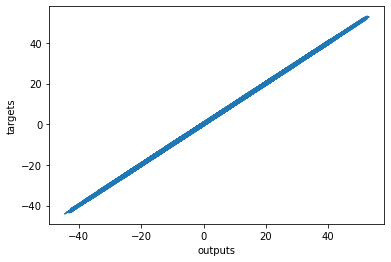

In [21]:
#Plot last outputs vs targets
#Since they are the last ones at the end of the training, they represent the final model accuracy.
#The closer this plot is to a 45 degree line, the closer target and output values are.

plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()